# HW 4 Numerical linear algebra ( 50 pts)


## Please restart the kernel and run all before you submit !


## Your Name: Fionnuala Eastwood

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import HTML
import math
%matplotlib widget

# Part 1: PCA (25 pts)

In this part, we will use PCA on some real dataset. 

Reuqirements:
1. You should write your own code. You are not allowed to use `sklear.decomposition.PCA` command. (5 pts)

2. Your solution should contain two functions. Function 1 takes data matrix X and integer k as inputs, and returns first k principal components. Function 2 takes data matrix X as input and a threshold $0\leq\eta\leq1$ as inputs, and returns an integer k such that the first $k$ principal components (smallest) has explained variance ratio more than $\eta$. **Your function should work for any data matrix X. In other words, you cannot use any global variable in your function.** (10 pts)

3. Visualize your new datasets in 2D and state your observations. (3 pts)

4. Report the smallest number of principal components reuired to explain 80% variance ratio for both datasets. (2 pts)

5. Function docstrings are required. You should also use inline comments and markdown to explain your code and make conclusions. (5 pts)

Hints:
1. You can assume that each row in $X$ represents a data.
2. Sample codes in lecture notes are helpful.

Datasets:
1. diabetes dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv"
2. swiss roll dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv"

In [4]:
# Function 1
def get_first_principal_components(X, k):
    """
    Inputs:
    X: matrix
    k: integer, number of principal components
    Outputs:
    Returns the first k principal components
    """
    # Standardize the data
    X_standard = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Singular Value Decomposition (SVD)
    U, sigma, V = np.linalg.svd(X_standard)

    # Select the first k principal components
    first_k_components = V[:k, :]
    
    return first_k_components

In [5]:
# Function 2
def get_k(X, n):
    """
    Inputs:
    X: matrix
    n: float, threshold (0 <= n <= 1)
    Outputs:
    Returns an integer k for the smallest/first principle componsents as explained varience ratio more than n
    """
    # standardize the data
    X_standard = (X - np.mean(X,axis=0))/np.std(X,axis=0)

    # SVD - decomposes the standardized data into 3 matrices
    U, sigma, V = np.linalg.svd(X_standard)

    # projects standardized data onlto principle components
    X_pca = X_standard @ V.T

    # variance calculation (variance of each pc)
        # computes variance along each column of the matrix where each column represents a principle comonent
    explained_variance = np.var(X_pca,axis=0)

    # total variance
    total_variance = np.sum(explained_variance)

    # explained variance ratio for each principle component
    explained_variance_ratio = explained_variance/total_variance
    
    # cumulative explained variance ratio
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    # the number of first principle components that have a explained variance over n
    k = np.argmax(cumulative_variance_ratio > n)

    return k + 1 # Add 1 to convert index to count of components

In [6]:
def PCA(X):
    """
    Inputs:
    X: matrix
    Outputs:
    Returns all principle components
    """
    # standardize the data
    X_standard = (X - np.mean(X,axis=0))/np.std(X,axis=0)

    # SVD - decomposes the standardized data into 3 matrices
    U, sigma, V = np.linalg.svd(X_standard)

    # projects standardized data onlto principle components
    X_pca = X_standard @ V.T
    
    return X_pca


The first 2 principle components for the diabetes dataset is : 
[[-0.1284321  -0.39308257 -0.36000261 -0.43982428 -0.43502617 -0.45194134
  -0.27061144 -0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]

The first 2 principle components for the swiss_roll dataset is : 
[[-0.1284321  -0.39308257 -0.36000261 -0.43982428 -0.43502617 -0.45194134
  -0.27061144 -0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]


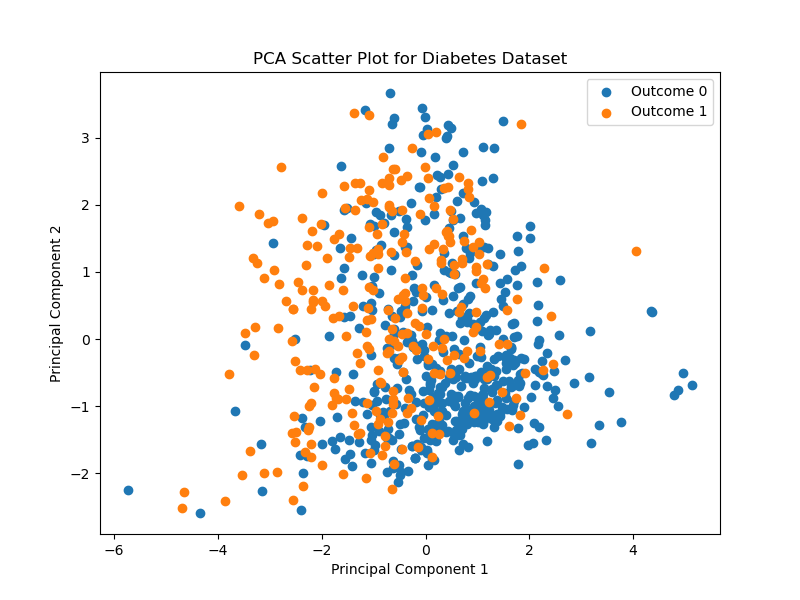

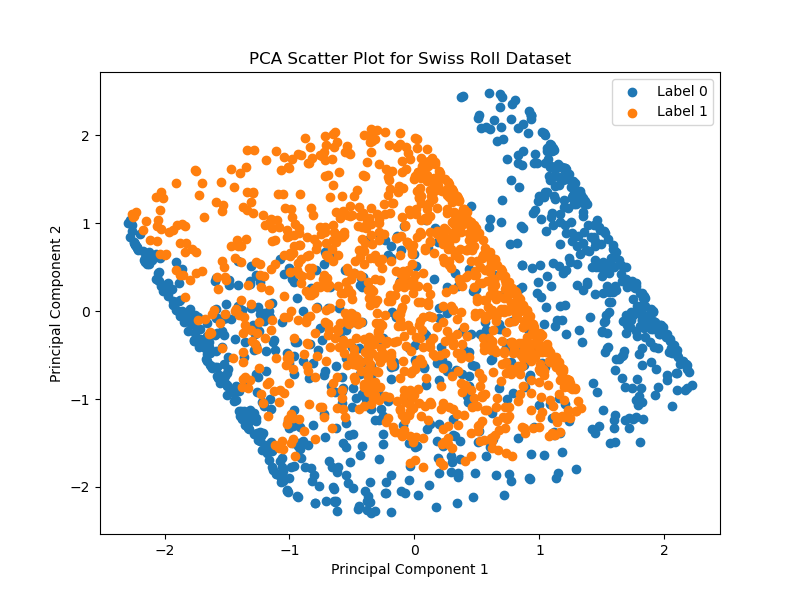

The smallest number of principal components reuired to explain 80% variance ratio for the diabetes dataset is : 5
The smallest number of principal components reuired to explain 80% variance ratio for the swiss roll dataset is : 3



In [7]:
# read in the data to pandas data frames
diabetes_url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv"
diabetes = pd.read_csv(diabetes_url)
swiss_roll_url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv"
swiss_roll = pd.read_csv(swiss_roll_url)

# create a y for diabetes out of the "Outcome" column
d_y = diabetes['Outcome']

# create X1 from diabetes by dropping the "Outcome" column
X1 = diabetes.drop('Outcome', axis=1).values

# create a y for swiss roll out of the "label" column
sr_y = swiss_roll['label'].astype(int)

# create X2 from swiss_roll by dropping the "label" column
X2 = swiss_roll.drop('label', axis=1).values

# set k value
k = 2

# set n value to be .8 to calculate 80% variance ratio for both datasets
n = .8

# Run the first function and print the results
data1 = get_first_principal_components(X1, k) # First data collection for Diabetes dataset
print(f"\nThe first {k} principle components for the diabetes dataset is : \n{data1}\n")
data2 = get_first_principal_components(X1, k) # Second data collection for Swiss Roll dataset
print(f"The first {k} principle components for the swiss_roll dataset is : \n{data2}")

# run the second function to get y's
y1 = get_k(X1, n)
y2 = get_k(X2, n)

# Visualize the new datasets in 2d
# Create the plot of first figure (Diabetes)
pca1 = PCA(X1)               # Create PCA for the first figure
plt.figure(figsize=(8, 6))   # create figure and size
for label in np.unique(d_y): # for loop cycling through d_y
    plt.scatter(pca1[d_y==label, 0], pca1[d_y==label, 1], label=f'Outcome {label}') # create scatter for every point 

# set x and y labels, title, and legend for first firgure
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot for Diabetes Dataset')
plt.legend()
plt.show()

# Create a plot of the second figure (Swiss Roll)
pca2 = PCA(X2)                # Create PCA for the second figure
plt.figure(figsize=(8, 6))    # create figure and size
for label in np.unique(sr_y): # for loop cycling through sr_y
    plt.scatter(pca2[sr_y==label, 0], pca2[sr_y==label, 1], label=f'Label {label}') # create scatter for every point

# set x and y labels, title, and legend for second figure
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot for Swiss Roll Dataset')
plt.legend()
plt.show()

# Output the y's from aboce - how many principle components needed for 80% variance ratio
print(f"The smallest number of principal components reuired to explain 80% variance ratio for the diabetes dataset is : {y1}")
print(f"The smallest number of principal components reuired to explain 80% variance ratio for the swiss roll dataset is : {y2}\n")

## Conclusion

From the 80% variance ratio and from observing the plots, I am able to visualize how the variance ratio is showing how dispersed the scatter is. It looks like that for both of the graphs, the different methods and the different labels are layered, pointing to a complexity in data, but the individual sections are contained, showing that the method type/label type is indivative of some type of pattern. Looking at the first two principal components outputted and the generated plots, it seems like the first two principal components are also pretty representative of the distribution of the points in the graphs, there being a similar amount of negative and positive numbers in both.


# Part 2: Least square (25 pts)

Consider the following least-square problem

$$ \mathop{ \mathrm{min} }_x \|Ax-b\|_2^2, $$

the solution can be written as a nice formula $x=(A^TA)^{-1}A^Tb$, which comes from normal equation $A^TAx = A^Tb$.


In this part, we want to compare the computational times of using matrix inverse and solve command.

Step 1: Write a function to generate matrix $A$ with m rows and N columns, and observation vector $b$ with m rows 1 column. Both matrix $A$ and vector $b$ are randomly generated by using `np.random`. The distribution of $A$ or $b$ can be either standard gaussian (`np.random.randn`) or uniform (`np.random.rand`). In other words, your function should allow four different choices, which are 1. gaussian $A$ and gaussian $b$, 2. gaussian $A$ and uniform $b$, 3. uniform $A$ and gaussian $b$, and 4. uniform $A$ and uniform $b$. (5 pts)

Step 2: Use function written in step 1 to generate $A$ and $b$ with fixed number of rows $m=10000$ and varied number of columns $N=[1000,2000,4000,8000,16000]$ (You can determine the distribution you want to use). Then, use matrix inverse and solve command to solve least square problem with $A$ and $b$. (5 pts)

Step 3: Visualization and conclusion. The first plot is computation time (y-axis) vs N (x-axis) for inverse matrix method and solve command method. The second plot is plotting log(time) (y-axis) vs log(N) (x-axis). You should add legends, titles, xlabels, ylabels and etc to make your plot clear. What is your conclusion? (10 pts, 5 pts each figure)


**Requirement:**

You should write docstring for your function and inline comments for your codes. (5 pts)

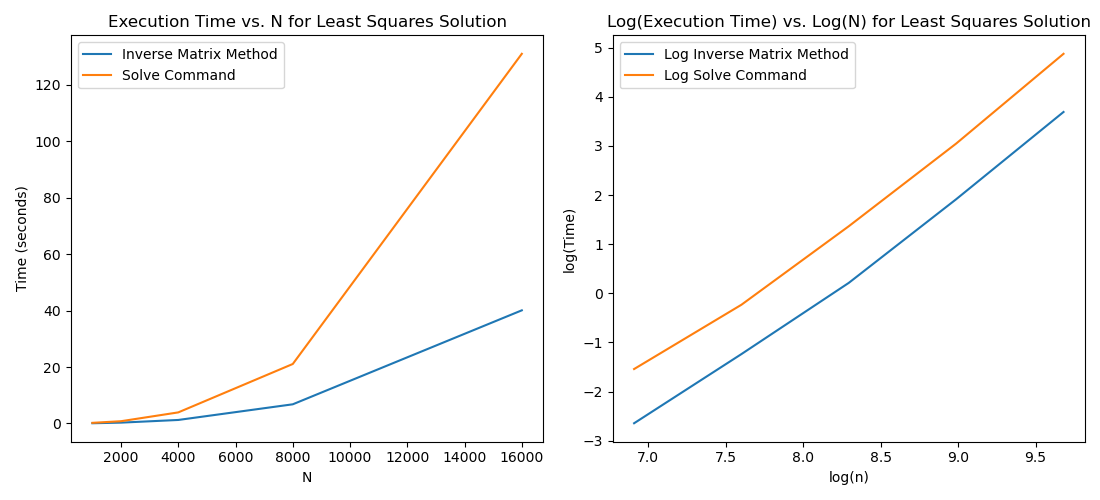

In [10]:
# Your solution here.
def function(m, n, type):
    """
    Inputs:
    m: integer amount of rows
    n: integer amount of columns
    type: type (1-4) corresponding to what type of distribution is wanted
        1. Both A and b are Gaussian
        2. A is Gaussian, b is Uniform
        3. A is Uniform, b is Gaussian
        4. Both A and b are Uniform
    Outputs:
    Returns two matrixes: A(with size m*n) and b(with size m*1)
    """
    #1 Both Gaussian
    if type == 1:
        A = np.random.randn(m, n)
        b = np.random.randn(m, 1)
    #2 A is Gaussian, b is Uniform
    if type == 2:
        A = np.random.randn(m, n)
        b = np.random.rand(m, 1)
    #3 A is Uniform, b is Gaussian
    if type == 3:
        A = np.random.rand(m, n)
        b = np.random.randn(m, 1)
    #4 Both uniform
    if type == 4:
        A = np.random.rand(m, n)
        b = np.random.rand(m, n)
    return A, b

# Set size for m and n
m = 10000
n_values = [1000, 2000, 4000, 8000, 16000]

# set up empty lists to be populated in the for loop
log_n_values = []     # holds list of log(n) values
solve_cmmd_time= []   # holds list of times for solve command
log_solve_time= []    # holds log of every element in previous list
inv_mat_cmmd_time= [] # holds list of times for inverse matrix command
log_inv_mat_time= []  # hold lof of every element in previous list

for n in n_values:
    # add the log of n to log_n_values list
    log_n_values.append(math.log(n))
    
    # generate a and b for type 1
    A, b = function(m, n, 1)  # Example usage for type 1 (both Gaussian)
    
    # Solving least squares problem
    # Solve Command
    x1start = time.time()               # begin the time
    x2 = np.linalg.solve(A.T@A,A.T@b)   # use solve command to compute least squares
    x1end = time.time()                 # end the time
    x1_run_time = x1end - x1start       # calculate the total run time for the solve command
    solve_cmmd_time.append(x1_run_time) # append the run time to the solve_cmmd_time list
    log_time1 = (math.log(x1_run_time)) # compute the log of the run time
    log_solve_time.append(log_time1)    # append the log(run time) to the log_solve_time list
    
    # #Inverse Matrix
    x2start = time.time()                # begin the time
    x2 = np.linalg.inv(A.T@A)@A.T@b      # use inverse squares command to compute least squares
    x2end = time.time()                  # end the time
    x2_run_time = x2end - x2start        # calculate the total run time for the solve command
    inv_mat_cmmd_time.append(x2_run_time)# append the run time to the solve_cmmd_time list            
    log_time2 = (math.log(x2_run_time))  # compute the log of the run time
    log_inv_mat_time.append(log_time2)   # append the log(run time) to the log_solve_time list

# set up figure and axis
fig, ax = plt.subplots(1, 2, figsize=(11, 5))

# Plot for the first subplot
ax[0].plot(n_values, solve_cmmd_time, label='Inverse Matrix Method') # plot for solve command time
ax[0].plot(n_values, inv_mat_cmmd_time, label='Solve Command')       # plot for inverse matrix time
ax[0].set_xlabel('N')                                                # set x label
ax[0].set_ylabel('Time (seconds)')                                   # set y label
ax[0].set_title('Execution Time vs. N for Least Squares Solution')   # set title
ax[0].legend()                                                       # create legend

# Plot for the second subplot
ax[1].plot(log_n_values, log_solve_time, label='Log Inverse Matrix Method') # plot for log solve command time
ax[1].plot(log_n_values, log_inv_mat_time, label='Log Solve Command')       # plot for log inverse matrix time
ax[1].set_xlabel('log(n)')                                                  # set x label
ax[1].set_ylabel('log(Time)')                                               # set y label
ax[1].set_title('Log(Execution Time) vs. Log(N) for Least Squares Solution')# set title
ax[1].legend()                                                              # create legend

#tighten layout and show plots
plt.tight_layout()
plt.show()

## Conculsions

From observations of my graph (and how long my kernel took to run), in general the larger the n value, the longer it takes to run the least squares problems. In addition, the solve command took much longer to complete than the inverse matrix command. The log plot showed both of these previous obervations in more intensity and linearity - the two lines with strong positive slopes, the solve line above the inverse matrix one. These conclusions poin to reccomending use of smaller n values and the use of the matrix command over the solve command for more efficency.